In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

salesSum = pd.read_csv(r'../DATA/Droped_t_sales_sum.csv', low_memory=False)
salesSum = salesSum[salesSum.sale_amt_3m >= 0]
print(salesSum.head(10))

           dt  shop_id  sale_amt_3m
0  2016-12-31     2143     72983.09
1  2016-07-31     2143    106943.03
2  2016-08-31     2143    183723.36
3  2016-09-30     2143    235568.57
4  2016-11-30     2143     80115.29
5  2016-12-31     1559     67228.29
6  2016-08-31     1559    267183.30
7  2017-01-31     1559     83264.96
8  2016-10-31     1559    123020.74
9  2016-12-31     1296     24583.73


In [2]:
tOrder = pd.read_csv(r'../DATA/t_order.csv',low_memory=False)
tOrder = tOrder[tOrder.sale_amt >= 0]
print(tOrder.head(10))

       ord_dt  sale_amt  offer_amt  offer_cnt  shop_id  rtn_cnt  rtn_amt  \
0  2016-09-04     19.82       0.00          0     1630        0      0.0   
1  2017-01-02     19.82       0.00          0     1630        0      0.0   
2  2016-09-23     19.82       0.00          0     1630        0      0.0   
3  2016-12-29     19.82       0.00          0     1630        0      0.0   
4  2016-08-26     19.82       0.00          0     1630        0      0.0   
5  2016-11-22     19.82       0.00          0     1630        0      0.0   
6  2016-10-17     19.82       0.00          0     1630        0      0.0   
7  2017-02-23     19.82       0.00          0     1630        0      0.0   
8  2016-11-20    138.76       0.00          0     1999        0      0.0   
9  2016-09-19    491.44      60.33          1     1411        0      0.0   

   ord_cnt  pid  user_cnt  
0        1   41         1  
1        1   41         1  
2        1   49         1  
3        1   49         1  
4        1   59        

In [3]:
tOrder['datetime'] = pd.to_datetime(tOrder['ord_dt'])
saleSumOnlyDateAndAmt = tOrder[['datetime','sale_amt']]
print(saleSumOnlyDateAndAmt.head(10))
sumPeerDay = saleSumOnlyDateAndAmt.groupby('datetime').sum()
print(sumPeerDay)

    datetime  sale_amt
0 2016-09-04     19.82
1 2017-01-02     19.82
2 2016-09-23     19.82
3 2016-12-29     19.82
4 2016-08-26     19.82
5 2016-11-22     19.82
6 2016-10-17     19.82
7 2017-02-23     19.82
8 2016-11-20    138.76
9 2016-09-19    491.44
              sale_amt
datetime              
2016-08-03  4693055.52
2016-08-04  4765698.05
2016-08-05  4653818.25
2016-08-06  4568180.56
2016-08-07  4530523.83
2016-08-08  4707560.98
2016-08-09  4367296.11
2016-08-10  4597558.40
2016-08-11  4877921.10
2016-08-12  4562581.38
2016-08-13  4504558.01
2016-08-14  4339015.12
2016-08-15  4661980.85
2016-08-16  4776332.72
2016-08-17  4771905.25
2016-08-18  4982663.68
2016-08-19  4673631.49
2016-08-20  4473541.84
2016-08-21  4524620.35
2016-08-22  4818622.59
2016-08-23  4797807.17
2016-08-24  4751103.01
2016-08-25  4885074.44
2016-08-26  4818654.83
2016-08-27  4795074.53
2016-08-28  4660007.28
2016-08-29  5031539.86
2016-08-30  5086662.95
2016-08-31  5376091.08
2016-09-01  5383889.79
...        

In [4]:
#将分组重新变为列属性
sumPeerDay = sumPeerDay.reset_index()
print(sumPeerDay)

      datetime    sale_amt
0   2016-08-03  4693055.52
1   2016-08-04  4765698.05
2   2016-08-05  4653818.25
3   2016-08-06  4568180.56
4   2016-08-07  4530523.83
5   2016-08-08  4707560.98
6   2016-08-09  4367296.11
7   2016-08-10  4597558.40
8   2016-08-11  4877921.10
9   2016-08-12  4562581.38
10  2016-08-13  4504558.01
11  2016-08-14  4339015.12
12  2016-08-15  4661980.85
13  2016-08-16  4776332.72
14  2016-08-17  4771905.25
15  2016-08-18  4982663.68
16  2016-08-19  4673631.49
17  2016-08-20  4473541.84
18  2016-08-21  4524620.35
19  2016-08-22  4818622.59
20  2016-08-23  4797807.17
21  2016-08-24  4751103.01
22  2016-08-25  4885074.44
23  2016-08-26  4818654.83
24  2016-08-27  4795074.53
25  2016-08-28  4660007.28
26  2016-08-29  5031539.86
27  2016-08-30  5086662.95
28  2016-08-31  5376091.08
29  2016-09-01  5383889.79
..         ...         ...
241 2017-04-01  5685644.99
242 2017-04-02  5876217.32
243 2017-04-03  5944836.44
244 2017-04-04  5731777.20
245 2017-04-05  6786146.15
2

In [5]:
#按每周的总和输出
sumPeerWeek = sumPeerDay.resample('1W',on='datetime',label='left').sum()

sumPeerWeek = sumPeerWeek.reset_index()
print(sumPeerWeek)


     datetime      sale_amt
0  2016-07-31  2.321128e+07
1  2016-08-07  3.195649e+07
2  2016-08-14  3.286468e+07
3  2016-08-21  3.352634e+07
4  2016-08-28  3.624112e+07
5  2016-09-04  3.907293e+07
6  2016-09-11  4.018648e+07
7  2016-09-18  4.809475e+07
8  2016-09-25  4.286545e+07
9  2016-10-02  4.376936e+07
10 2016-10-09  5.474385e+07
11 2016-10-16  5.320401e+07
12 2016-10-23  5.497747e+07
13 2016-10-30  6.165956e+07
14 2016-11-06  9.260746e+07
15 2016-11-13  4.662141e+07
16 2016-11-20  5.677906e+07
17 2016-11-27  5.004545e+07
18 2016-12-04  4.460787e+07
19 2016-12-11  5.428900e+07
20 2016-12-18  4.362388e+07
21 2016-12-25  4.423800e+07
22 2017-01-01  4.609281e+07
23 2017-01-08  4.407183e+07
24 2017-01-15  2.304304e+07
25 2017-01-22  5.130222e+06
26 2017-01-29  1.309172e+07
27 2017-02-05  2.829022e+07
28 2017-02-12  3.626705e+07
29 2017-02-19  3.861582e+07
30 2017-02-26  4.013387e+07
31 2017-03-05  4.230632e+07
32 2017-03-12  4.167928e+07
33 2017-03-19  4.199100e+07
34 2017-03-26  4.271

In [6]:
baiduIndex = pd.read_csv(r'../DATA/BaiDuIn.csv', low_memory=False)
baiduIndex['datetime'] = pd.to_datetime(baiduIndex['datetime'])
print(baiduIndex.head(10))

    datetime  iphone  computer  alldev
0 2016-05-29  151532    254279  405811
1 2016-06-05  155725    223624  379349
2 2016-06-12  192068    327895  519963
3 2016-06-19  163104    264454  427558
4 2016-06-26  136514    230388  366902
5 2016-07-03  136983    232059  369042
6 2016-07-10  137784    233595  371379
7 2016-07-17  141883    236019  377902
8 2016-07-24  145117    238615  383732
9 2016-07-31  141900    236865  378765


In [7]:
baiduIndex = baiduIndex[(baiduIndex['datetime']>='2016-08-07')&(baiduIndex['datetime']<='2017-04-30')]
print(baiduIndex)

     datetime  iphone  computer  alldev
10 2016-08-07  140994    236530  377524
11 2016-08-14  139847    237085  376932
12 2016-08-21  137562    232730  370292
13 2016-08-28  136249    237919  374168
14 2016-09-04  151523    260567  412090
15 2016-09-11  156142    209142  365284
16 2016-09-18  144647    251723  396370
17 2016-09-25  152643    226622  379265
18 2016-10-02  158812    167614  326426
19 2016-10-09  146441    235138  381579
20 2016-10-16  148919    231263  380182
21 2016-10-23  158575    234968  393543
22 2016-10-30  191329    294951  486280
23 2016-11-06  268775    383814  652589
24 2016-11-13  160581    226552  387133
25 2016-11-20  146278    211525  357803
26 2016-11-27  145344    195158  340502
27 2016-12-04  138567    208727  347294
28 2016-12-11  157118    233641  390759
29 2016-12-18  141726    204006  345732
30 2016-12-25  135740    196599  332339
31 2017-01-01  154074    205025  359099
32 2017-01-08  158752    224060  382812
33 2017-01-15  158315    212550  370865


In [8]:
baiduIndex.columns

Index(['datetime', 'iphone', 'computer', 'alldev'], dtype='object')

In [9]:
baiduIndexDate = baiduIndex.set_index('datetime')
baiduIndexDate.columns
print(baiduIndexDate.head(10))

            iphone  computer  alldev
datetime                            
2016-08-07  140994    236530  377524
2016-08-14  139847    237085  376932
2016-08-21  137562    232730  370292
2016-08-28  136249    237919  374168
2016-09-04  151523    260567  412090
2016-09-11  156142    209142  365284
2016-09-18  144647    251723  396370
2016-09-25  152643    226622  379265
2016-10-02  158812    167614  326426
2016-10-09  146441    235138  381579


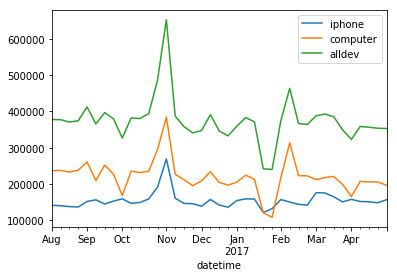

In [10]:
%matplotlib inline
import matplotlib
baiduIndexDate.plot()

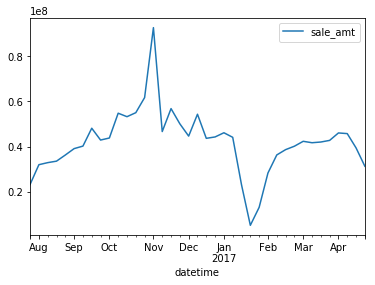

In [11]:
sumPeerWeek_week = sumPeerWeek.set_index('datetime')
sumPeerWeek_week.plot()
#plt.legend(loc='best')

In [12]:
AllFeature = baiduIndexDate
AllFeature['sale_amt'] = sumPeerWeek_week['sale_amt']/200
print(AllFeature.head(10))

            iphone  computer  alldev      sale_amt
datetime                                          
2016-08-07  140994    236530  377524  159782.45550
2016-08-14  139847    237085  376932  164323.38090
2016-08-21  137562    232730  370292  167631.71925
2016-08-28  136249    237919  374168  181205.62265
2016-09-04  151523    260567  412090  195364.63495
2016-09-11  156142    209142  365284  200932.38225
2016-09-18  144647    251723  396370  240473.75180
2016-09-25  152643    226622  379265  214327.24900
2016-10-02  158812    167614  326426  218846.80795
2016-10-09  146441    235138  381579  273719.25950


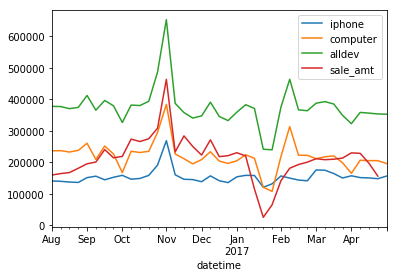

In [13]:
AllFeature.plot()

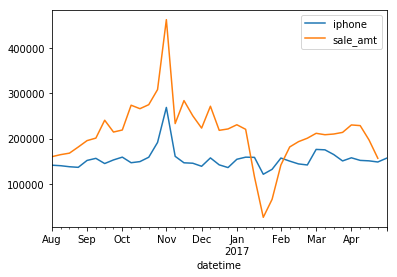

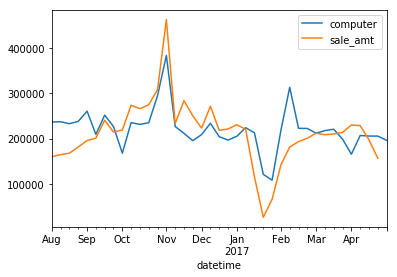

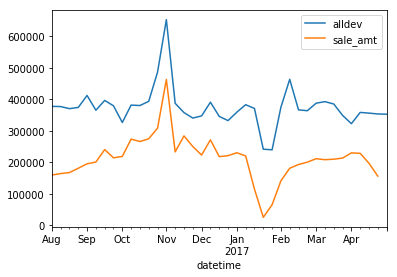

In [14]:
AllFeature[['iphone','sale_amt']].plot()
AllFeature[['computer','sale_amt']].plot()
AllFeature[['alldev','sale_amt']].plot()

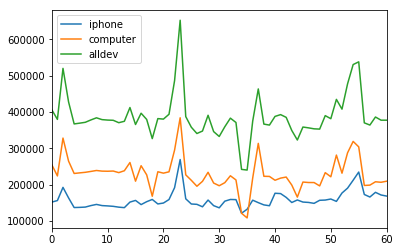

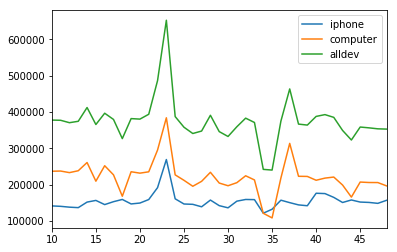

In [17]:
baiduIndexAll = pd.read_csv(r'../DATA/BaiDuIn.csv', low_memory=False)
baiduIndexAll['datetime'] = pd.to_datetime(baiduIndexAll['datetime'])
baiduIndexAll.set_index('datetime')
baiduIndexAll.plot()
baiduIndex.plot()

In [16]:
print(AllFeature)

            iphone  computer  alldev      sale_amt
datetime                                          
2016-08-07  140994    236530  377524  159782.45550
2016-08-14  139847    237085  376932  164323.38090
2016-08-21  137562    232730  370292  167631.71925
2016-08-28  136249    237919  374168  181205.62265
2016-09-04  151523    260567  412090  195364.63495
2016-09-11  156142    209142  365284  200932.38225
2016-09-18  144647    251723  396370  240473.75180
2016-09-25  152643    226622  379265  214327.24900
2016-10-02  158812    167614  326426  218846.80795
2016-10-09  146441    235138  381579  273719.25950
2016-10-16  148919    231263  380182  266020.02890
2016-10-23  158575    234968  393543  274887.37210
2016-10-30  191329    294951  486280  308297.79335
2016-11-06  268775    383814  652589  463037.31895
2016-11-13  160581    226552  387133  233107.04595
2016-11-20  146278    211525  357803  283895.31725
2016-11-27  145344    195158  340502  250227.26140
2016-12-04  138567    208727  3